# Clasificación multiclase

## Introduction

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de letras.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

In [131]:
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
from matplotlib import pyplot
# Modulo de optimizacion en scipy
from scipy import optimize
# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Clasificación multiclase

Para este ejercicio, se usará regresión logística y redes neuronales para reconocer letras escritos a mano (de a-z). El reconocimiento automático de dígitos escritos a mano se usa ampliamente en la actualidad, desde el reconocimiento de códigos postales (códigos postales) en sobres de correo hasta el reconocimiento de montos escritos en cheques bancarios. Este ejercicio  mostrará cómo los métodos que ha aprendido se pueden utilizar para esta tarea de clasificación.

La primera parte del ejercicio, extenderá la implementación anterior de la regresión logística y la aplicará a la clasificación de uno contra todos (one vs all).

### 1.1 Dataset

Se proporciona un conjunto de datos en `emnist-letters.mat` que contiene 120000 ejemplos de entrenamiento de letras escritos a mano (este es un subconjunto del conjunto de datos de letras escritos a mano [MNIST] https://www.nist.gov/itl/products-and-services/emnist-dataset)). El formato `.mat` significa que los datos se han guardado en un formato de matriz nativo Octave/MATLAB, en lugar de un formato de texto (ASCII) como un archivo csv. Usamos el formato `.mat` aquí para mostrar los diferentes formatos en los que se pueden presentar los datasets. Python proporciona mecanismos para cargar el formato nativo de MATLAB usando la función `loadmat` dentro del módulo` scipy.io`. Esta función devuelve un diccionario de Python con claves que contienen los nombres de las variables dentro del archivo `.mat`.

Hay 120000 ejemplos de entrenamiento en `emnist-letters.mat`, donde cada ejemplo de entrenamiento es una imagen en escala de grises de 28 píxeles por 28 píxeles del dígito. Cada píxel está representado por un número de punto flotante que indica la intensidad de la escala de grises en esa ubicación. La cuadrícula de 28 por 28 píxeles se "desenrolla" en un vector de 784 dimensiones. Cada uno de estos ejemplos de entrenamiento se convierte en una sola fila en nuestra matriz de datos "X". Esto da una matriz `X` de 120000 por 784 donde cada fila es un ejemplo de entrenamiento para una imagen de letras escrita a mano.

$$ X = \begin{bmatrix} - \: (x^{(1)})^T \: - \\ -\: (x^{(2)})^T \:- \\ \vdots \\ - \: (x^{(m)})^T \:-  \end{bmatrix} $$

La segunda parte del conjunto de entrenamiento es un vector "y" de 120000 dimensiones que contiene etiquetas para el conjunto de entrenamiento. 

Se inicia el ejercicio cargando primero el conjunto de datos. 

In [132]:
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784

# 26 etiquetas, de a a z
num_labels = 26

#  datos de entrenamiento almacenados en los arreglos X, y
data = loadmat('emnist-letters.mat')
# mostramos las llaves de dataset
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dataset'])


In [133]:
# en la llave dataset esta los datos con los que debemos trabjar
data = data['dataset']
# mostramos el tamaño
print("Dataset shape:", data.shape)
# mostramos el tipo de datos que tiene la matris
print("Dataset data type:", data.dtype)
# tiene train: datos de entrenamiento
# test: datos de prueba
# mapping: una tabla de correspondencia que asocia los valores de las etiquetas con las letras del alfabeto.

Dataset shape: (1, 1)
Dataset data type: [('train', 'O'), ('test', 'O'), ('mapping', 'O')]


In [134]:
# sacamos los datos de entrenamiendo
datos_entrenamiento = data['train'][0, 0]
# sacamos los datos de prueba
datos_pruebas = data['test'][0, 0]

In [135]:

print("Tamaño de los datos de entrenamieto:", datos_entrenamiento.shape)
print("Tipos de datos de datos_entrenamiento", datos_entrenamiento.dtype)
print("Tamaño de los datos de prueba:", datos_pruebas.shape)
print("Tipos de datos de datos_pruebas", datos_pruebas.dtype)

Tamaño de los datos de entrenamieto: (1, 1)
Tipos de datos de datos_entrenamiento [('images', 'O'), ('labels', 'O'), ('writers', 'O')]
Tamaño de los datos de prueba: (1, 1)
Tipos de datos de datos_pruebas [('images', 'O'), ('labels', 'O'), ('writers', 'O')]


In [136]:
# cargamos los datos a usar tanto en X como Y de entrenamiento
X_entrenamiento = datos_entrenamiento['images'][0][0]
y_entrenamiento = datos_entrenamiento['labels'][0][0].ravel()
# cargamos los datos a usar tanto en X como Y de pruebas
X_pruebas = datos_pruebas['images'][0][0]
y_pruebas = datos_pruebas['labels'][0][0].ravel()

In [137]:
y_entrenamiento[y_entrenamiento == 26] = 0
y_pruebas[y_pruebas == 26] = 0
print(set(y_entrenamiento))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


In [138]:
# verificamos si las etiquetas empizan de 0 o 1
print(set(y_pruebas))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


In [139]:
print("Tamaño de 'X' de entrenamiento: ", X_entrenamiento.shape)
print("Tamaño de 'y' de entrenamiento: ", y_entrenamiento.shape)
print("Tamaño de 'X' de prueba: ", X_pruebas.shape)
print("Tamaño de 'y' de prueba: ", y_pruebas.shape)

Tamaño de 'X' de entrenamiento:  (124800, 784)
Tamaño de 'y' de entrenamiento:  (124800,)
Tamaño de 'X' de prueba:  (20800, 784)
Tamaño de 'y' de prueba:  (20800,)


In [140]:
print(X_entrenamiento[0])
print(y_entrenamiento[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 125  82
  37  37  39 115 157  94  21  10  32  37  37  37  37  37  37  37  82 125
 114  20   0   0   0   3 109 245 249 233 217 217 217 245 251 234 172 142
 203 217 217 217 217 217 217 217 233 249 245 109   3   0   0   4 114 253
 254 254 254 254 254 254 254 254 252 251 254 254 254 254 254 254 254 254
 254 254 254 127   4   0   0   0  45 214 233 251 254 254 254 254 255 255
 255 255 255 255 255 255 255 255 255 255 254 254 251 113   4   0   0   0
   0   5  22  82 128 160 184 217 217 218 249 254 255 255 255 255 255 254
 254 247 216 170  83   7   0   0   0   0   0   0   0   2   5  16  25  37
  40  50 227 254 255 255 254 254 252 245 220 159  3

### 1.2 Visualización de los datos

Se comenzará visualizando un subconjunto del conjunto de entrenamiento. Se selecciona al azar, 100 filas de `X` y pasa esas filas a la función` displayData`. Esta función asigna cada fila a una imagen en escala de grises de 28 píxeles por 28 píxeles y muestra las imágenes juntas.

In [141]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

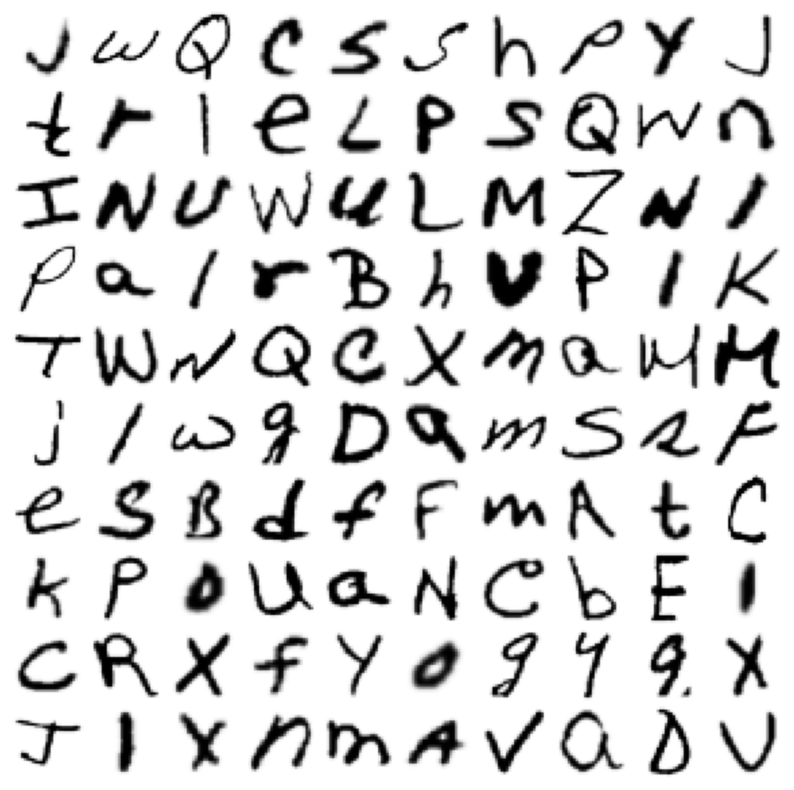

In [142]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
m = y_entrenamiento.size
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_entrenamiento[rand_indices, :]

displayData(sel)

<a id="section1"></a>
#### Vectorización de la funcion de costo

Se inicia escribiendo una versión vectorizada de la función de costo. En la regresión logística (no regularizada), la función de costo es

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

Para calcular cada elemento en la suma, tenemos que calcular $h_\theta(x^{(i)})$ para cada ejemplo $i$, donde $h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$ y $g(z) = \frac{1}{1+e^{-z}}$ es la funcion sigmoidea. Resulta que podemos calcular esto rápidamente para todos los ejemplos usando la multiplicación de matrices. Definamos $X$ y $\theta$ como

$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} $$

Luego, de calcular el producto matricial $X\theta$, se tiene: 

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$

En la última igualdad, usamos el hecho de que $a^Tb = b^Ta$ if $a$ y $b$ son vectores. Esto permite calcular los productos $\theta^T x^{(i)}$ para todos los ejemplos $i$ en una linea de codigo.

#### Vectorización del gradiente

Recordemos que el gradiente del costo de regresión logística (no regularizado) es un vector donde el elemento $j^{th}$ se define como
$$ \frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

Para vectorizar esta operación sobre el conjunto de datos, se inicia escribiendo todas las derivadas parciales explícitamente para todos $\theta_j$,

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

donde

$$  h_\theta(x) - y = 
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)} 
\end{bmatrix} $$

Nota $x^{(i)}$ es un vector, mientras $h_\theta\left(x^{(i)}\right) - y^{(i)}$ es un escalar(simple número).
Para comprender el último paso de la derivación, dejemos $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ y
observar que:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix} 
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

donde los valores $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right)$.

La expresión anterior nos permite calcular todas las derivadas parciales sin bucles.
Si se siente cómodo con el álgebra lineal, le recomendamos que trabaje con las multiplicaciones de matrices anteriores para convencerse de que la versión vectorizada hace los mismos cálculos.

<div class="alert alert-box alert-warning">
** Consejo de depuración: ** El código de vectorización a veces puede ser complicado. Una estrategia común para la depuración es imprimir los tamaños de las matrices con las que está trabajando usando la propiedad `shape` de las matrices` numpy`.

Por ejemplo, dada una matriz de datos $X$ de tamaño $100\veces 20$ (100 ejemplos, 20 características) y $\theta$, un vector con tamaño $20$, puede observar que `np.dot (X, theta) `es una operación de multiplicación válida, mientras que` np.dot (theta, X) `no lo es.

Además, si tiene una versión no vectorizada de su código, puede comparar la salida de su código vectorizado y el código no vectorizado para asegurarse de que produzcan las mismas salidas.</div>
<a id="lrCostFunction"></a>

In [143]:
# funcion para normalizar las caracteristicas
def featureNormalize(X):
    X_norm = X.copy()
    media_norm = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    # Ignorar las advertencias de división por cero
    with np.errstate(divide='ignore', invalid='ignore'):
        X_norm = (X - media_norm) / sigma

    # Reemplazar los valores NaN o infinitos con cero
    X_norm = np.nan_to_num(X_norm, copy=False, nan=0.0, posinf=0.0, neginf=0.0)

    return X_norm, media_norm, sigma

In [144]:
# normalizamos las X's de entrenamiento
X_norm, media_norm, sigma = featureNormalize(X_entrenamiento)
# normalizamos las X's de prueba
X_norm_p, media_norm_p, sigma_p = featureNormalize(X_pruebas)

In [145]:
# asignamos a nuevas variables globales
X_ent = X_norm
X_pru = X_norm_p
# X_ent = X_entrenamiento
#print(X_ent[0])
#print(X_pru[0])

### 1.3 Vectorización de regresión logística

Se utilizará múltiples modelos de regresión logística uno contra todos para construir un clasificador de clases múltiples. Dado que hay 10 clases, deberá entrenar 10 clasificadores de regresión logística separados. Para que esta capacitación sea eficiente, es importante asegurarse de que el código esté bien vectorizado.

En esta sección, se implementará una versión vectorizada de regresión logística que no emplea ningún bucle "for".

Para probar la regresión logística vectorizada, se usara datos personalizados como se definen a continuación.

<a id="section1"></a>
#### 1.3.1 Vectorización de la funcion de costo

Se inicia escribiendo una versión vectorizada de la función de costo. En la regresión logística (no regularizada), la función de costo es

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

Para calcular cada elemento en la suma, tenemos que calcular $h_\theta(x^{(i)})$ para cada ejemplo $i$, donde $h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$ y $g(z) = \frac{1}{1+e^{-z}}$ es la funcion sigmoidea. Resulta que podemos calcular esto rápidamente para todos los ejemplos usando la multiplicación de matrices. Definamos $X$ y $\theta$ como

$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} $$

Luego, de calcular el producto matricial $X\theta$, se tiene: 

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$

En la última igualdad, usamos el hecho de que $a^Tb = b^Ta$ if $a$ y $b$ son vectores. Esto permite calcular los productos $\theta^T x^{(i)}$ para todos los ejemplos $i$ en una linea de codigo.

#### 1.3.2 Vectorización del gradiente

Recordemos que el gradiente del costo de regresión logística (no regularizado) es un vector donde el elemento $j^{th}$ se define como
$$ \frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

Para vectorizar esta operación sobre el conjunto de datos, se inicia escribiendo todas las derivadas parciales explícitamente para todos $\theta_j$,

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

donde

$$  h_\theta(x) - y = 
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)} 
\end{bmatrix} $$

Nota $x^{(i)}$ es un vector, mientras $h_\theta\left(x^{(i)}\right) - y^{(i)}$ es un escalar(simple número).
Para comprender el último paso de la derivación, dejemos $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ y
observar que:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix} 
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

donde los valores $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right)$.

La expresión anterior nos permite calcular todas las derivadas parciales sin bucles.
Si se siente cómodo con el álgebra lineal, le recomendamos que trabaje con las multiplicaciones de matrices anteriores para convencerse de que la versión vectorizada hace los mismos cálculos.

<div class="alert alert-box alert-warning">
** Consejo de depuración: ** El código de vectorización a veces puede ser complicado. Una estrategia común para la depuración es imprimir los tamaños de las matrices con las que está trabajando usando la propiedad `shape` de las matrices` numpy`.

Por ejemplo, dada una matriz de datos $X$ de tamaño $100\veces 20$ (100 ejemplos, 20 características) y $\theta$, un vector con tamaño $20$, puede observar que `np.dot (X, theta) `es una operación de multiplicación válida, mientras que` np.dot (theta, X) `no lo es.

Además, si tiene una versión no vectorizada de su código, puede comparar la salida de su código vectorizado y el código no vectorizado para asegurarse de que produzcan las mismas salidas.</div>
<a id="lrCostFunction"></a>

In [146]:
# funcion sigmoide, devuelve una probabilidad
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [147]:
# funcion de costo
def lrCostFunction(theta, X, y, lambda_):
    # Inicializa algunos valores útiles
    m = y.size
    
    # Convierte las etiquetas a valores enteros si son booleanos
    if y.dtype == bool:
        y = y.astype(int)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    temp = theta.copy()
    temp[0] = 0
    
    epsilon = 1e-8  # Pequeño valor epsilon para evitar la división por cero y el logaritmo de cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

<a id="section2"></a>
### 1.4 Clasificacion One-vs-all
En esta parte del ejercicio, se implementará la clasificación de uno contra todos mediante el entrenamiento de múltiples clasificadores de regresión logística regularizados, uno para cada una de las clases $K$ en nuestro conjunto de datos. En el conjunto de datos de dígitos escritos a mano, $K = 10$, pero su código debería funcionar para cualquier valor de $K$.

El argumento `y` de esta función es un vector de etiquetas de 0 a 9. Al entrenar el clasificador para la clase $k \in \{0, ..., K-1 \} $, querrá un vector K-dimensional de etiquetas $y$, donde $y_j \ in 0, 1$ indica si la instancia de entrenamiento $j ^ {th}$ pertenece a la clase $k$ $(y_j = 1)$, o si pertenece a una clase diferente $(y_j = 0)$.

Además, se utiliza `optimize.minimize` de scipy para este ejercicio.
<a id="oneVsAll"></a>

In [148]:
# funcion de one vs all se encarga de entrenar al modelo
def oneVsAll(X, y, num_labels, lambda_):
    # algunas variables utiles
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        
        all_theta[c] = res.x

    return all_theta

In [149]:
lambda_ = 0.1
all_theta = oneVsAll(X_ent, y_entrenamiento, num_labels, lambda_)

<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all

Después de entrenar el clasificador de one-vs-all, se puede usarlo para predecir el dígito contenido en una imagen determinada. Para cada entrada, debe calcular la "probabilidad" de que pertenezca a cada clase utilizando los clasificadores de regresión logística entrenados. La función de predicción one-vs-all seleccionará la clase para la cual el clasificador de regresión logística correspondiente genera la probabilidad más alta y devolverá la etiqueta de clase (0, 1, ..., K-1) como la predicción para el ejemplo de entrada.

In [150]:
# funcion de prediccion
def predictOneVsAll(all_theta, X):
    
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    
    return p

In [155]:
def obtener_letra(posicion):
    if 0 <= posicion < 25:
        letra = chr(97 + posicion)  # 97 es el valor ASCII de 'a'
        return letra
    elif posicion==26:
        letra = chr(97 + 26)  # devuelve z
        return letra
    else:
        return "Posición fuera de rango"

Una vez que haya terminado, se llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$. Debería apreciarse que la precisión del conjunto de entrenamiento es de aproximadamente 95,1% (es decir, clasifica correctamente el 95,1% de los ejemplos del conjunto de entrenamiento).

(124800, 784) (20800, 784)
Precision del conjuto de entrenamiento: 72.37%
Precision del conjuto de pruebas: 70.82%
(1, 784)
(1, 785)
Predecido: [0]
Letra predecida a
Esperado:  1
Letra esperada:  b


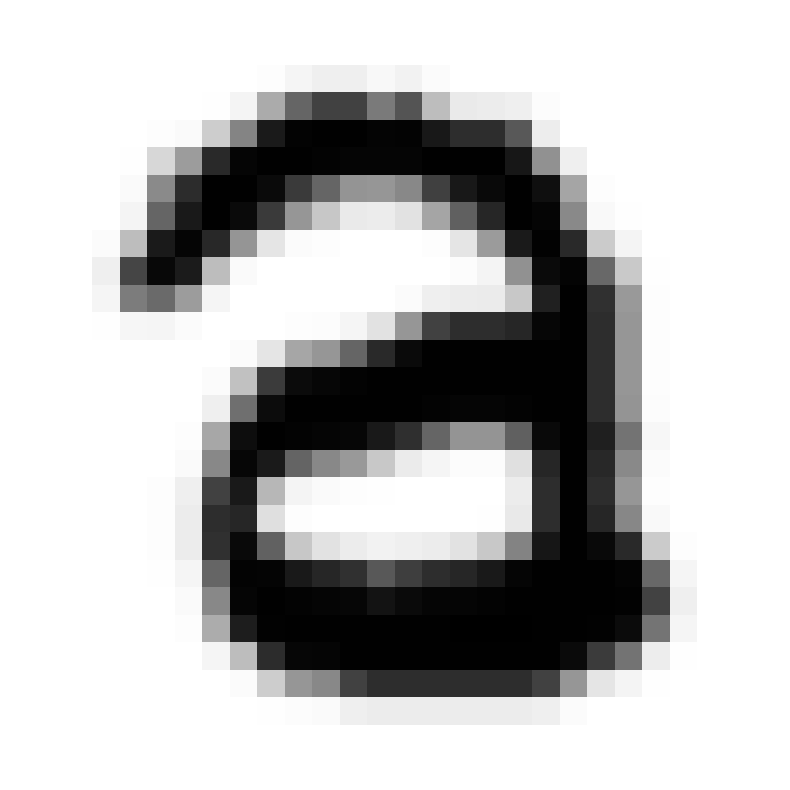

In [156]:
# mostramos dimensiones de X_prueba
print(X_ent.shape, X_pru.shape)
# calculamos porcentaje de entrenamiento
pred_ent = predictOneVsAll(all_theta, X_ent)

print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred_ent == y_entrenamiento) * 100))
# calculamos porcentaje
pred_pru = predictOneVsAll(all_theta, X_pru)
print('Precision del conjuto de pruebas: {:.2f}%'.format(np.mean(pred_pru == y_pruebas) * 100))
# cargamos un ejemplo para predecir
XPrueba = X_pru[200:201, :].copy()
print(XPrueba.shape) # mostramos dimensiones X

# agregamos 1 al inicio para la multiplicacion
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
print(XPrueba.shape) # mostramos dimensiones de la nueva X
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print("Predecido:",p)
print("Letra predecida", obtener_letra(p[0]))
# graficamos el ejemplo
X_graf = X_pruebas[200:201, :]
displayData(X_graf)
# lo que deberia salir
print("Esperado: ", y_pruebas[200])

print("Letra esperada: ", obtener_letra(y_pruebas[200]))